Importar bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Manipulação de dados (DataFrames)
import pandas as pd
#Operações numéricas e vetoriais
import numpy as np
#Visualizações básicas e avançadas
import matplotlib.pyplot as plt
#Graficos Estatíticos com estilo
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from google.colab import files
uploaded = files.upload()

Saving dados_vendas_empresa_1_corrigido.csv to dados_vendas_empresa_1_corrigido.csv


In [10]:
#importantando os dados, lendo dados frame
df = pd.read_csv('dados_vendas_empresa_1_corrigido.csv')

In [11]:
#ver as primeiras linhas do data frame
print(df.head())

   data_venda              nome_cliente estado       nome_produto  \
0  2025-02-14           Brenda Monteiro     RS             Tablet   
1  2025-04-19             Nathan Mendes     PR               Café   
2  2025-05-11       Dra, Mariana da Paz     BA              Leite   
3  2025-01-13           Pedro das Neves     PR  Jogo de Tabuleiro   
4  2025-01-23  Dr, João Miguel Oliveira     SP               Bola   

     categoria  quantidade  preco_unitario  total_venda  quantidade_estoque  \
0  Eletrônicos           3          390.42      1171.26                 112   
1    Alimentos           2         1793.52      3587.04                 280   
2    Alimentos           9         1610.73     14496.57                 116   
3   Brinquedos           8         2391.07     19128.56                  81   
4   Brinquedos           8          235.34      1882.72                 198   

  localizacao_estoque  
0            B2-A1-C2  
1            A1-B1-C1  
2            C3-A2-B2  
3            D

conhecer os nosso dados

In [ ]:
print(f"\nSeu dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas")

In [ ]:
#nomes das colunas
print(df.columns)

In [ ]:
#nomes das colunas
print(df.columns.tolist())

In [ ]:
#verificar se tem dados faltando
dados_faltantes = df.isnull().sum()
print(dados_faltantes)

In [12]:
#resumo estatistico simples
print(df.describe())

       quantidade  preco_unitario  total_venda  quantidade_estoque
count  200.000000      200.000000    200.00000          200.000000
mean     5.805000     1447.800200   8412.64690          162.870000
std      2.927426      841.430293   6864.71105           81.097392
min      1.000000       22.360000     81.18000           11.000000
25%      3.000000      715.275000   2630.60000           97.750000
50%      6.000000     1490.750000   6392.92000          169.000000
75%      8.000000     2195.755000  12998.90250          233.250000
max     10.000000     2985.620000  26662.59000          298.000000


In [13]:
#valores zerados em colunas numericas
df[['quantidade','preco_unitario','total_venda']].eq(0).sum()


,0
quantidade,0
preco_unitario,0
total_venda,0


Nos codigos acima, eu fiz o import das bibliotecas, analisei os dados, vi se os dados estão certos.

Agora irei fazer operações basicas no Python

In [14]:
#somar uma coluna
print(df['total_venda'].sum())

1682529.38


In [15]:
#multiplicando colunas
df['total_venda'] = df['quantidade'] * df['preco_unitario']
print(df['total_venda'])

0       1171.26
1       3587.04
2      14496.57
3      19128.56
4       1882.72
         ...   
195     1718.77
196     2895.27
197     1166.30
198     3926.32
199     9041.80
Name: total_venda, Length: 200, dtype: float64


In [16]:
#media de colinas total venda
print(df['total_venda'].mean())

8412.6469


In [18]:
#filtros compostos ou combinados
print(df[(df['categoria'] == 'Eletrônicos') & (df['quantidade'] > 3)])

     data_venda              nome_cliente estado    nome_produto    categoria  \
6    2025-06-08           Emanuel Costela     RJ        Notebook  Eletrônicos   
9    2025-02-02           Alícia da Cunha     RJ         Monitor  Eletrônicos   
18   2025-02-22      Maria Fernanda Jesus     RJ  Fone de Ouvido  Eletrônicos   
19   2025-04-04             Alana Peixoto     BA  Fone de Ouvido  Eletrônicos   
20   2025-04-04      Dra, Catarina Castro     PE          Tablet  Eletrônicos   
24   2025-02-04          Eduarda Teixeira     RS         Monitor  Eletrônicos   
50   2024-12-21                Davi Silva     BA          Tablet  Eletrônicos   
56   2025-03-07               Clara Viana     PE         Monitor  Eletrônicos   
63   2024-12-13       João Vitor da Costa     RJ  Fone de Ouvido  Eletrônicos   
67   2025-04-10          Vicente Teixeira     BA  Fone de Ouvido  Eletrônicos   
68   2025-03-10      Dr, Henrique Pereira     RJ        Notebook  Eletrônicos   
69   2024-12-20           Lo

Agrupamentos

In [19]:
#MEDIA DE QUANTIADE VENDIDA POR CATEGORIA
print(df.groupby('categoria')['quantidade'].mean())

categoria
Alimentos      5.682927
Brinquedos     5.590909
Eletrônicos    6.694444
Móveis         5.361111
Vestuário      5.767442
Name: quantidade, dtype: float64


In [20]:
#soma de quantidade vendida por categoria
print(df.groupby('categoria')['quantidade'].sum())

categoria
Alimentos      233
Brinquedos     246
Eletrônicos    241
Móveis         193
Vestuário      248
Name: quantidade, dtype: int64


In [21]:
#multiplas estatisticas por categorias
print(df.groupby('categoria')['quantidade'].agg(['mean', 'sum', 'count', 'max', 'min']))

                 mean  sum  count  max  min
categoria                                  
Alimentos    5.682927  233     41   10    1
Brinquedos   5.590909  246     44   10    1
Eletrônicos  6.694444  241     36   10    1
Móveis       5.361111  193     36   10    1
Vestuário    5.767442  248     43   10    1


Inicando Gráficos

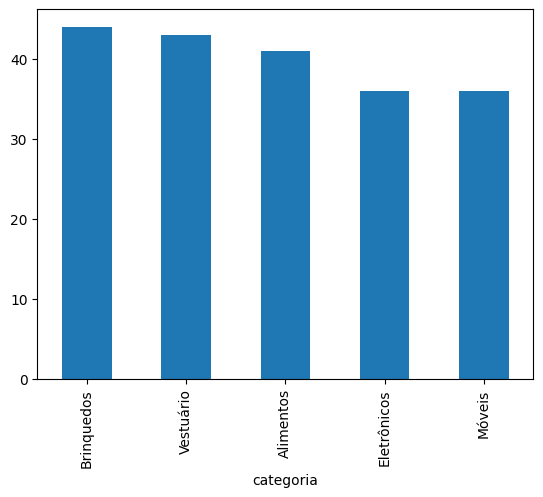

In [23]:
#grafico simples de barras
df['categoria'].value_counts().plot(kind='bar')
plt.show()

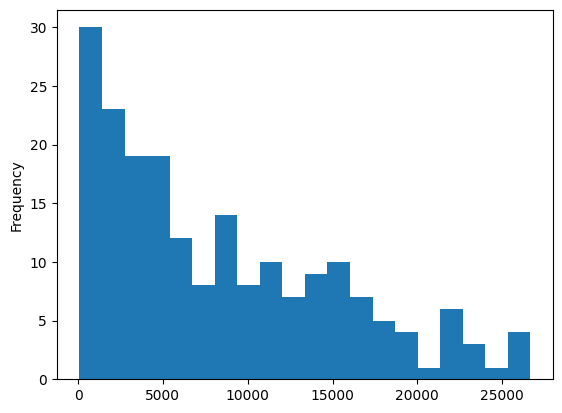

In [24]:
#histrograma de distribuição de valores de venda'total_venda'
df['total_venda'].plot(kind='hist', bins=20)
plt.show()

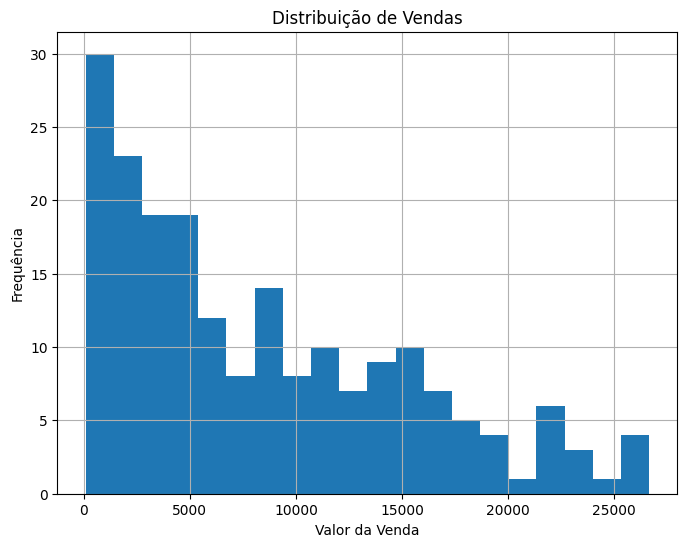

In [26]:
#histograma versao 2
plt.figure(figsize=(8, 6))
df['total_venda'].hist(bins=20)
plt.title('Distribuição de Vendas')
plt.xlabel('Valor da Venda')
plt.ylabel('Frequência')
plt.show()

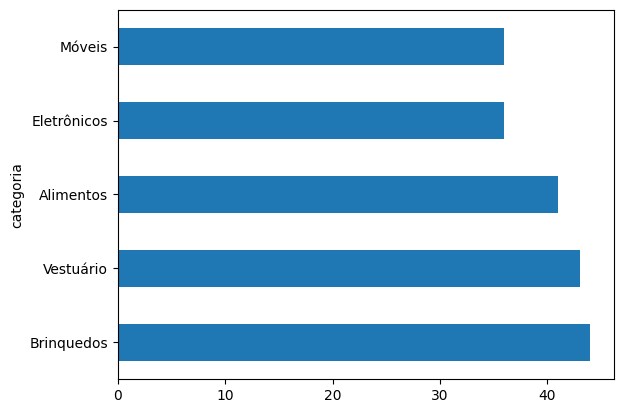

In [27]:
#grafico de barras horizontais com total_venda
df['categoria'].value_counts().plot(kind='barh')
plt.show()

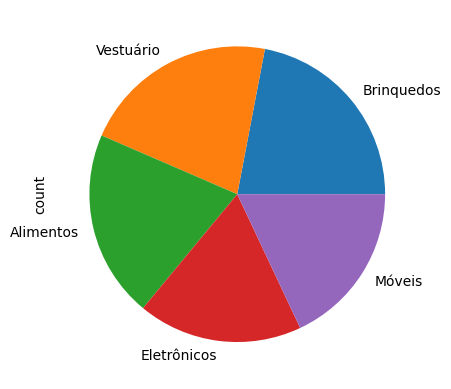

In [28]:
#grafico de pizza com total_venda
df['categoria'].value_counts().plot(kind='pie')
plt.show()

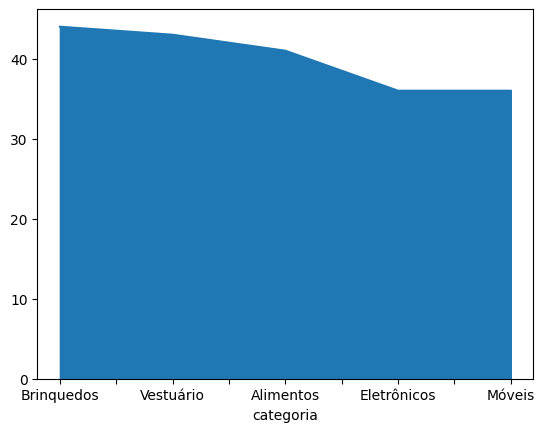

In [29]:
#grafico de area  com total_venda
df['categoria'].value_counts().plot(kind='area')
plt.show()

Criar uma coluna nova, VIP ou NÂO VIP

In [30]:
#criar uma nova coluna status do cliente
df['status'] = np.where(df['total_venda'] > 1000, 'VIP', 'NÂO VIP')
print(df['status'])

0      VIP
1      VIP
2      VIP
3      VIP
4      VIP
      ... 
195    VIP
196    VIP
197    VIP
198    VIP
199    VIP
Name: status, Length: 200, dtype: object


In [31]:
#ver o head do data set
print(df.head())

   data_venda              nome_cliente estado       nome_produto  \
0  2025-02-14           Brenda Monteiro     RS             Tablet   
1  2025-04-19             Nathan Mendes     PR               Café   
2  2025-05-11       Dra, Mariana da Paz     BA              Leite   
3  2025-01-13           Pedro das Neves     PR  Jogo de Tabuleiro   
4  2025-01-23  Dr, João Miguel Oliveira     SP               Bola   

     categoria  quantidade  preco_unitario  total_venda  quantidade_estoque  \
0  Eletrônicos           3          390.42      1171.26                 112   
1    Alimentos           2         1793.52      3587.04                 280   
2    Alimentos           9         1610.73     14496.57                 116   
3   Brinquedos           8         2391.07     19128.56                  81   
4   Brinquedos           8          235.34      1882.72                 198   

  localizacao_estoque status  
0            B2-A1-C2    VIP  
1            A1-B1-C1    VIP  
2            C3-A

Trabalhando com datas

In [32]:
#garatir que as informações de data estap no formato datedata
df['data_venda'] = pd.to_datetime(df['data_venda'])

In [33]:
#extratir as informações de data
df['ano'] = df['data_venda'].dt.year
df['mes'] = df['data_venda'].dt.month
df['dia'] = df['data_venda'].dt.day

Analise de oportunidades

In [34]:
#qual o total de venda?
print(df['total_venda'].sum())

1682529.38


In [35]:
#qual a media de vendas?
print(df['total_venda'].mean())

8412.6469


In [36]:
#qual categoria vende mais?
print(df.groupby('categoria')['total_venda'].sum())

categoria
Alimentos      378777.27
Brinquedos     331006.07
Eletrônicos    322217.60
Móveis         286853.41
Vestuário      363675.03
Name: total_venda, dtype: float64


In [38]:
#maior venda individual
print(df['total_venda'].max())

26662.590000000004


Analise Final

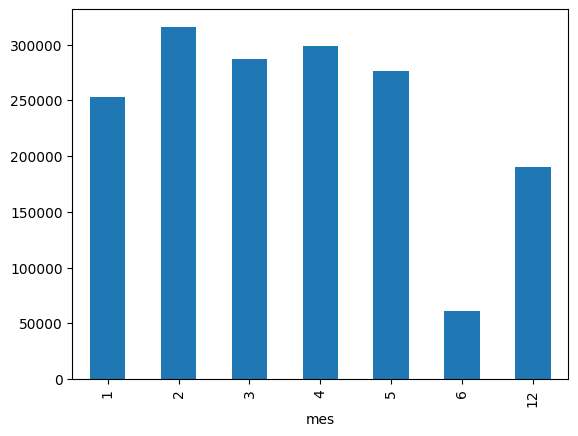

In [39]:
#grafico de vendas totais por mês
df.groupby('mes')['total_venda'].sum().plot(kind='bar')
plt.show()

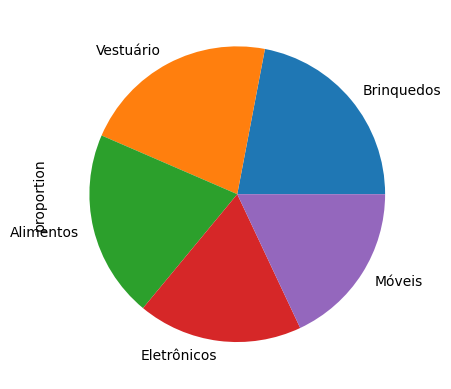

In [40]:
#grafico de pizza do percentual de vendas por categoria
df['categoria'].value_counts(normalize=True).plot(kind='pie')
plt.show()

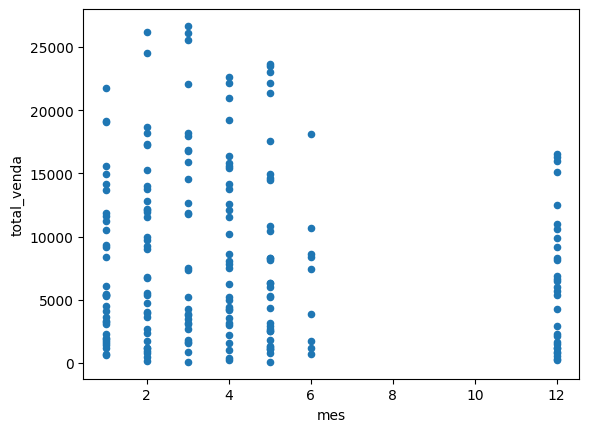

In [42]:
#grafico de dispersao de vendas por mes
df.plot(x='mes', y='total_venda', kind='scatter')
plt.show()

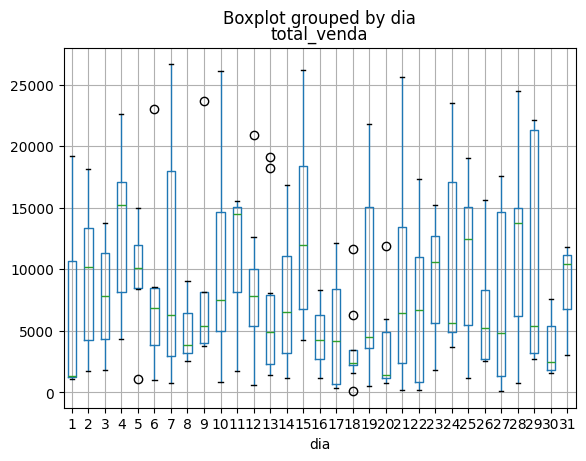

In [48]:
#boxplot da distribuicao de vendas por dia
df.boxplot(column='total_venda', by='dia')
plt.show()

In [50]:
#comparando o valor medio de vendas vendidas entre vip e nao vip
print(df.groupby('status')['total_venda'].mean())

status
NÂO VIP     534.383333
VIP        9191.815824
Name: total_venda, dtype: float64


In [51]:
#comparando o valor total vendido por status
print(df.groupby('status')['total_venda'].sum())

status
NÂO VIP       9618.90
VIP        1672910.48
Name: total_venda, dtype: float64


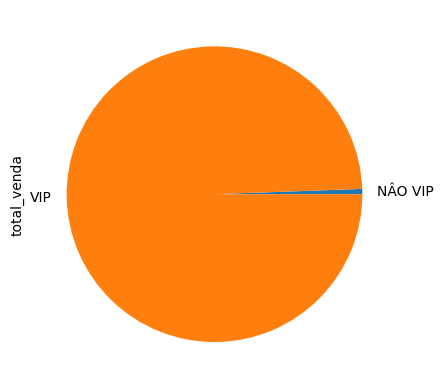

In [52]:
#gerar grafico de pizza comparando total de vendas vip e nao vip
df.groupby('status')['total_venda'].sum().plot(kind='pie')
plt.show()

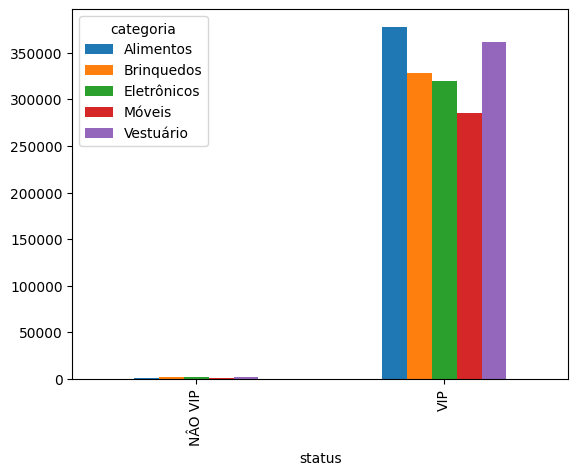

In [53]:
#gerar graficos de barras comparando as compras dos vips e nao vips por categoria
df.groupby(['status', 'categoria'])['total_venda'].sum().unstack().plot(kind='bar')
plt.show()